New York City Airbnb Open Data

Airbnb listings and metrics in NYC, NY, USA (2019)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [ ]:
!pip3 install pycaret
!pip3 install shap
!pip install pyyaml==5.4.1

     |████████████████████████████████| 301 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 72.9 MB/s 
     |████████████████████████████████| 1.7 MB 59.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 1.8 MB/s 
     |████████████████████████████████| 1.3 MB 38.5 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 114 kB 39.6 MB/s 
     |████████████████████████████████| 2.0 MB 42.3 MB/s 
     |████████████████████████████████| 261 kB 45.2 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 15.6 MB 352 kB/s 
     |████████████████████████████████| 3.1 MB 24.3 MB/s 
     |████████████████████████████████| 102 kB 6.0 MB/s 
     |████████████████████████████████| 10.9 MB 34.4 MB/s 
     |███████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive')

['.file-revisions-by-id', 'MyDrive', '.shortcut-targets-by-id', '.Trash-0']

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/NYCAnB_cleaned.csv'
#/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,index,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3,3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,4,4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5,5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
fig = px.histogram(df,x='price',nbins=1000)
fig.show()

In [ ]:
fig = px.histogram(df,x='minimum_nights',nbins=1000)
fig.show()

In [ ]:
df = df.drop(columns = ['host_id','host_name','Unnamed: 0','index'])

In [ ]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38019 entries, 0 to 38018
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38019 non-null  object 
 1   neighbourhood                   38019 non-null  object 
 2   latitude                        38019 non-null  float64
 3   longitude                       38019 non-null  float64
 4   room_type                       38019 non-null  object 
 5   price                           38019 non-null  int64  
 6   minimum_nights                  38019 non-null  int64  
 7   number_of_reviews               38019 non-null  int64  
 8   last_review                     38019 non-null  object 
 9   reviews_per_month               38019 non-null  float64
 10  calculated_host_listings_count  38019 non-null  int64  
 11  availability_365                38019 non-null  int64  
dtypes: float64(3), int64(5), object(

In [ ]:
df['last_review'].astype(str)

0        2018-10-19
1        2019-05-21
2        2019-07-05
3        2018-11-19
4        2019-06-22
            ...    
38014    2019-07-07
38015    2019-07-07
38016    2019-07-07
38017    2019-07-07
38018    2019-07-08
Name: last_review, Length: 38019, dtype: object

In [ ]:
def to_year(x):
  return x.split('-')[0]

def to_month(x):
  return x.split('-')[1]

def to_day(x):
  return x.split('-')[2]

df['year'] = df.last_review.apply(to_year)
df['month'] = df.last_review.apply(to_month)
df['day'] = df.last_review.apply(to_day)

In [ ]:
dates = sorted(df.last_review.drop_duplicates())

date_dict = {}
i = 0
for date in dates:
    date_dict[date] = i
    i += 1

In [ ]:
df['date_id'] = df.last_review.apply(lambda x: date_dict[x])

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date_id
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,40.728120,-73.951116,133.946343,4.975644,29.515111,1.382032,5.208764,113.947947,1479.642284
std,0.054890,0.046623,98.003233,7.473912,48.428284,1.686221,26.569061,129.108021,399.599175
min,40.506410,-74.244420,30.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,40.688685,-73.982350,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,1392.000000
50%,40.721610,-73.954770,102.000000,2.000000,10.000000,0.730000,1.000000,54.000000,1702.000000
75%,40.763020,-73.935205,169.000000,4.000000,34.000000,2.040000,2.000000,226.000000,1736.000000
max,40.913060,-73.712990,799.000000,40.000000,629.000000,58.500000,327.000000,365.000000,1751.000000


In [ ]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,date_id
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,1489
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21,1703
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05,1748
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19,1520
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,06,22,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38014,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,2019,07,07,1750
38015,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,2019,07,07,1750
38016,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,2019,07,07,1750
38017,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,2019,07,07,1750


In [ ]:
#for user request
user_request =df.iloc[37368,:]
print(user_request)

#to remove user request from machine learning testing
df = df.iloc[:37367,:]

neighbourhood_group                     Manhattan
neighbourhood                            Kips Bay
latitude                                  40.7454
longitude                                -73.9775
room_type                         Entire home/apt
price                                         349
minimum_nights                                  1
number_of_reviews                               4
last_review                            2019-07-01
reviews_per_month                               4
calculated_host_listings_count                  1
availability_365                              265
year                                         2019
month                                          07
day                                            01
date_id                                      1744
Name: 37368, dtype: object


In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
model = setup(
    data=df,
    target='price',
    ignore_features=['last_review'],
    train_size = 0.9
    
)

,Description,Value
0,session_id,7507
1,Target,price
2,Original Data,"(37367, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33630, 254)"


In [ ]:
get_config('X_train')

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,day,date_id,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,neighbourhood_Bay Terrace Staten Island,neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,...,neighbourhood_Vinegar Hill,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Brighton,neighbourhood_West Farms,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
15438,40.690590,-73.956017,3.0,20.0,0.61,4.0,90.0,12.0,1605.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33803,40.707020,-74.010872,2.0,9.0,2.52,327.0,347.0,5.0,1718.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36779,40.751751,-73.973824,1.0,3.0,3.00,3.0,85.0,1.0,1744.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9187,40.744511,-73.992264,2.0,25.0,1.22,1.0,221.0,3.0,1685.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29286,40.650589,-73.945061,3.0,1.0,0.11,1.0,179.0,8.0,1478.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28778,40.753929,-73.996330,1.0,2.0,0.23,47.0,361.0,2.0,1503.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
compare_models(include=['rf','dt','lr','lightgbm','ridge','lasso','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,41.7092,4711.8966,68.6273,0.5059,0.3781,0.3269,0.503
rf,Random Forest Regressor,42.3804,4781.8873,69.1324,0.4985,0.3825,0.3334,41.142
ridge,Ridge Regression,46.3677,5565.4769,74.5866,0.4164,0.4599,0.3754,0.104
lr,Linear Regression,46.4275,5576.4664,74.6602,0.4152,0.4613,0.3765,0.301
lasso,Lasso Regression,48.3854,6054.2741,77.7918,0.3652,0.4499,0.4049,0.097
huber,Huber Regressor,51.9175,7747.3614,87.8333,0.1871,0.4905,0.4095,8.039
dt,Decision Tree Regressor,57.9567,9524.5805,97.5752,0.0010,0.5159,0.4424,0.666


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7368, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model = setup(
    data=df,
    target='price',
    normalize=True,                         # pre-processing
    normalize_method='zscore',              # pre-processing
    ignore_features=['last_review'],
    train_size = 0.9
    
)

,Description,Value
0,session_id,8409
1,Target,price
2,Original Data,"(37367, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33630, 255)"


In [ ]:
compare_models(include=['rf','dt','lr','lightgbm','ridge','lasso','huber'],
               sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,39.7619,4196.2875,64.7682,0.4279,0.3871,0.2990,8.271
lightgbm,Light Gradient Boosting Machine,38.6511,3534.3613,59.4445,0.5179,0.3615,0.3124,0.509
rf,Random Forest Regressor,39.2854,3599.4404,59.9885,0.5089,0.3666,0.3192,42.915
ridge,Ridge Regression,42.0114,3968.7520,62.9893,0.4588,0.4212,0.3501,0.114
lr,Linear Regression,42.4617,4671.1509,67.9341,0.3612,0.4252,0.3568,0.356
lasso,Lasso Regression,43.9283,4338.9403,65.8603,0.4083,0.4236,0.3769,0.115
dt,Decision Tree Regressor,53.8490,7142.5257,84.4965,0.0256,0.4966,0.4255,0.707


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [ ]:
model = setup(
    data=df,
    target='price',
    normalize=True,                         # pre-processing
    normalize_method='minmax',              # pre-processing
    ignore_features=['last_review'],
)


,Description,Value
0,session_id,3121
1,Target,price
2,Original Data,"(37367, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26156, 255)"


In [ ]:
compare_models(include=['rf','dt','lr','lightgbm','ridge','lasso','huber'],
               sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,40.2705,4348.3528,65.9101,0.4221,0.3898,0.2997,5.715
lightgbm,Light Gradient Boosting Machine,39.2662,3657.8809,60.4537,0.5137,0.3641,0.3151,0.429
rf,Random Forest Regressor,39.9117,3723.8836,60.9877,0.5050,0.3695,0.3223,32.748
ridge,Ridge Regression,42.6654,4096.8635,63.9820,0.4553,0.4223,0.3529,0.094
lr,Linear Regression,45.6774,26016.2705,134.5149,-2.4692,0.4344,0.3772,0.273
lasso,Lasso Regression,45.0090,4618.5216,67.9343,0.3860,0.4213,0.3814,0.086
dt,Decision Tree Regressor,54.1378,7276.4052,85.2879,0.0312,0.4973,0.4277,0.546


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [ ]:
model = setup(
    data=df,
    target='price',
    ignore_features=['last_review'],
    normalize=True,
    normalize_method='minmax',
    polynomial_features=True,
    polynomial_degree=2
        
)

,Description,Value
0,session_id,5774
1,Target,price
2,Original Data,"(37367, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26156, 253)"


In [ ]:
compare_models(include=['rf','dt','lr','lightgbm','ridge','lasso','huber'],
               sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,39.9232,4246.2577,65.1459,0.4220,0.3888,0.2995,5.771
lightgbm,Light Gradient Boosting Machine,38.8929,3579.8912,59.8158,0.5125,0.3638,0.3139,0.397
rf,Random Forest Regressor,39.6315,3675.7026,60.6134,0.4995,0.3701,0.3222,32.132
ridge,Ridge Regression,42.1969,4011.6394,63.3225,0.4538,0.4183,0.3512,0.093
lasso,Lasso Regression,44.4844,4514.1984,67.1747,0.3853,0.4200,0.3791,0.089
dt,Decision Tree Regressor,53.9194,7150.4797,84.5449,0.0254,0.4997,0.4305,0.543
lr,Linear Regression,49.2598,301741.6531,321.5882,-39.4325,0.4370,0.4794,0.268


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [ ]:
huber_zscore = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.4105,6597.4821,81.2249,0.3640,0.4103,0.3162
1,42.7184,5597.4437,74.8161,0.3941,0.3999,0.3059
2,42.9956,6022.9595,77.6077,0.3625,0.4098,0.3045
3,43.0408,6066.1568,77.8855,0.3734,0.4023,0.3019
4,42.1851,5767.8667,75.9465,0.3817,0.4034,0.3036
5,41.2781,5116.3171,71.5284,0.4009,0.3969,0.3004
6,44.3132,6370.0418,79.8125,0.3626,0.4209,0.3157
7,43.1413,6349.3393,79.6827,0.3615,0.4108,0.3087
8,42.6584,5724.2471,75.6588,0.3831,0.4057,0.3084
9,42.2520,5567.3357,74.6146,0.3827,0.4069,0.3044


In [ ]:
huber_zscore_tuned = tune_model(huber_zscore,
           optimize='MAPE',
           search_library='scikit-learn',
           search_algorithm='random'
           )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.2887,6735.3400,82.0691,0.3507,0.4069,0.3070
1,42.7686,5754.3020,75.8571,0.3771,0.3993,0.2994
2,42.9340,6160.4751,78.4887,0.3479,0.4068,0.2957
3,43.0407,6205.3800,78.7742,0.3590,0.4003,0.2943
4,42.0131,5879.4694,76.6777,0.3698,0.4004,0.2949
5,41.3756,5237.3275,72.3694,0.3868,0.3942,0.2939
6,44.2797,6516.1913,80.7229,0.3480,0.4147,0.3075
7,43.2525,6505.5954,80.6573,0.3458,0.4104,0.3026
8,42.6808,5855.0811,76.5185,0.3690,0.4054,0.3010
9,42.1657,5667.2722,75.2813,0.3717,0.4031,0.2968


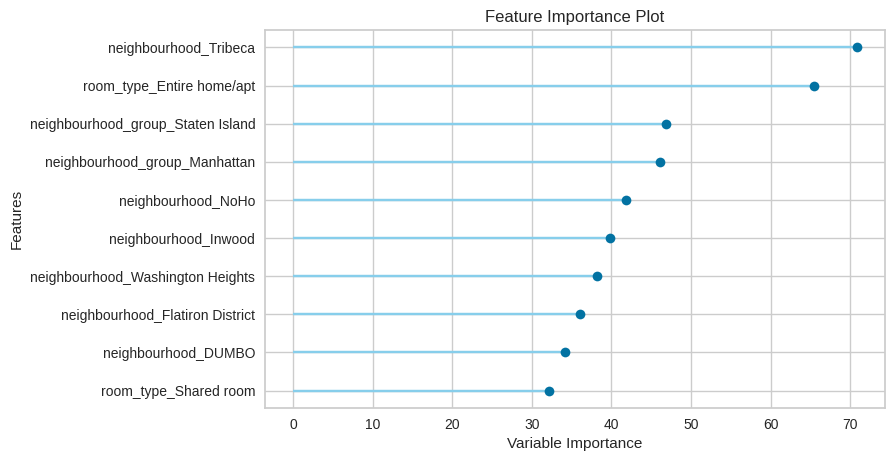

In [ ]:
%matplotlib inline
plot_model(huber_zscore_tuned, plot='feature')

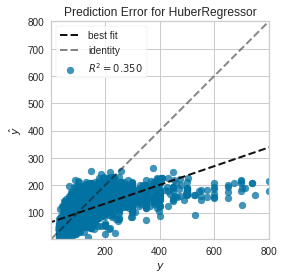

In [ ]:
%matplotlib inline
plot_model(huber_zscore_tuned, plot='error')

In [ ]:
%matplotlib inline
evaluate_model(huber_zscore_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
save_model(huber_zscore_tuned, model_name='airbnb2019')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['last_review'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='price')),
                 ('fix_perfect', Remove_100(target='price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('fea

In [ ]:
#check out the price here and compare
user_request

neighbourhood_group                         Bronx
neighbourhood                          Mott Haven
latitude                                  40.8079
longitude                                 -73.924
room_type                         Entire home/apt
price                                         100
minimum_nights                                  1
number_of_reviews                               2
last_review                            2019-07-07
reviews_per_month                               2
calculated_host_listings_count                  1
availability_365                               40
year                                         2019
month                                          07
day                                            07
date_id                                      1745
Name: 37368, dtype: object

In [ ]:
user_request.drop(columns=['price'],inplace=True)

In [ ]:
user_request = pd.DataFrame(user_request)
user_request = user_request.T

In [ ]:
loaded_model = load_model('airbnb2019')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predict_model(loaded_model, user_request)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,date_id,Label
37368,Bronx,Mott Haven,40.8079,-73.924,Entire home/apt,100,1,2,2019-07-07,2,1,40,2019,07,07,1745,110.576903
